I'm also importing the two Norfolk crime datasets in csv format into pandas for analysis. I must be able to choose the relevant element and extract data from the website.

In [ ]:
import pandas
hudt = pandas.read_csv('https://data.norfolk.gov/resource/uxgi-fkzu.csv')
print('Row Count:' , hudt.shape[0])
hudt.head()

Row Count: 20


,first,last,height,weight,hair,eye,dob,sex,race,date_arr,charge
0,DELILAH,NDAMBUKI,NaN,NaN,NaN,NaN,1996-11-16T00:00:00.000,F,B,2023-04-19T23:47:00.000,ASSAULT & BATTERY -FAMILY MEMBER
1,ANTON,WILLIAMS,65.0,180.0,BLK,BRO,1973-11-06T00:00:00.000,M,B,2023-04-19T13:22:00.000,FALSE STATEMENT TO OBTAIN CREDIT -LOSS >=$200
2,TERRY,MATTHEWS,70.0,180.0,GRY,BRO,1956-08-05T00:00:00.000,M,B,2023-04-19T11:05:00.000,"POSSESSION OF SCHEDULE I,II CONTROLLED SUBSTANCE"
3,JANNIKA,WILLIAMS,65.0,180.0,BLK,BRO,1983-01-30T00:00:00.000,F,B,2023-04-19T13:15:00.000,FAIL TO APPEAR ON FELONY CHARGE
4,DONQUAY,GRIFFIN,69.0,260.0,BLK,BRO,1991-08-03T00:00:00.000,M,B,2023-04-19T13:38:00.000,VIOLATION OF COURT ORDER


In [ ]:
import pandas
hudt = pandas.read_csv('https://data.norfolk.gov/api/views/r7bn-2egr/rows.csv?accessType=DOWNLOAD')
print('Row Count:' , hudt.shape[0])
hudt.head()

Row Count: 114583


,Incident ID,Offense,Block Address,Street,Date of Occurrence,Hour of Occurrence,Tract,Zone,District,Report Area,Day of the Week,Neighborhood
0,220728002048,VANDALISM,3000.0,LLEWELLYN AV,07/27/2022,2200.0,52,134,BLUE,1,WE,PARK PLACE
1,220313000764,HIT & RUN - PROPERTY,700.0,35TH ST,03/12/2022,1700.0,52,134,BLUE,1,SA,PARK PLACE
2,211106000401,VANDALISM,700.0,35TH ST,11/05/2021,0.0,52,134,BLUE,1,FR,PARK PLACE
3,201118001089,VANDALISM,600.0,26TH ST,11/18/2020,2000.0,57,134,BLUE,1,WE,PARK PLACE
4,190603000116,VANDALISM,800.0,JOHNSTONS RD,06/03/2019,1530.0,40,235,BLUE,2,MO,CHESAPEAKE GARDENS/ MAMIE HOMES


The next stage will be to integrate the code that scrapes the web with the code that pulls in the crime data and start some output that will show crime within a specified time frame immediately after convicts are released due to COVID-19. I'll then create some graphs to show the data. I'll start drawing conclusions for the audience after the code is finished and the data is compiled. The statistics will be compared to prior years within the same time period. I will also look at certain sorts of crimes to see if there is any influence there.This timeframe will probably coincide with the start of the COVID-19 lockdowns, so we may need to make some further conclusions at this point.

In [ ]:
import pandas as pd
import io
import requests


url="https://data.norfolk.gov/api/views/r7bn-2egr/rows.csv?accessType=DOWNLOAD"
s=requests.get(url).content
crimeData=pd.read_csv(io.StringIO(s.decode('utf-8')),low_memory=False)

I'm going to format my data source in the following code snippet. At a high level, I know I want to concentrate on crime done over a specific time period. This implies that I will only require two columns from my data source. The crime and the date it occurred. Because the date of occurrence is not in the appropriate format, I must write some code to format it into a valid pythiong date format.
At a high level, I will simply need the date and a count of all crimes, but when I dig down to determine what sorts of crimes are affected, I will also need the offense field. I'll also want to separate the year, month, and week into buckets for subsequent visual examination.

In [ ]:
crimeData = crimeData.loc[:, ['Incident ID', 'Offense','Date of Occurrence']]
crimeData = crimeData.rename({"Incident ID": "ID"}, axis="columns")
crimeData['Date of Occurrence'] = pd.to_datetime(crimeData['Date of Occurrence'], infer_datetime_format=True)
crimeData['Year'] = pd.DatetimeIndex(crimeData['Date of Occurrence']).year
crimeData['Month'] = pd.DatetimeIndex(crimeData['Date of Occurrence']).month
crimeData['Week'] = pd.DatetimeIndex(crimeData['Date of Occurrence']).week

crimeData.head()

<ipython-input-4-8de56c2e6a52>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  crimeData['Week'] = pd.DatetimeIndex(crimeData['Date of Occurrence']).week


,ID,Offense,Date of Occurrence,Year,Month,Week
0,220728002048,VANDALISM,2022-07-27,2022,7,30
1,220313000764,HIT & RUN - PROPERTY,2022-03-12,2022,3,10
2,211106000401,VANDALISM,2021-11-05,2021,11,44
3,201118001089,VANDALISM,2020-11-18,2020,11,47
4,190603000116,VANDALISM,2019-06-03,2019,6,23


In this view, I wanted to take a high-level look at crime counts by year. We know the COVID pandemic started in 2020. I was wondering if crime was significantly lower in comparison to the other years, due to the lockdown, but it is only slightly lower.

In [ ]:
howManyYearsOfData = crimeData.Year.unique()
print(howManyYearsOfData)
print()
aggByYear = crimeData.groupby(['Year']).count()[['ID']]
print(aggByYear.sort_values(by=['Year','ID']))

[2022 2021 2020 2019 2018 2023]

         ID
Year       
2018  16816
2019  23636
2020  21465
2021  22123
2022  24165
2023   6378


Next I take the data and format to get a visualation comparing by year to year the magnitude of crime committed month over month.

In [ ]:
import matplotlib.pyplot as plt

y2017 = crimeData.loc[crimeData['Year'] == 2017].set_index(['Year', 'Month']).count(level='Month')[['ID']]
y2018 = crimeData.loc[crimeData['Year'] == 2018].set_index(['Year', 'Month']).count(level='Month')[['ID']]
y2019 = crimeData.loc[crimeData['Year'] == 2019].set_index(['Year', 'Month']).count(level='Month')[['ID']]
y2020 = crimeData.loc[crimeData['Year'] == 2020].set_index(['Year', 'Month']).count(level='Month')[['ID']]
yearComp = pd.DataFrame({'2017': y2017['ID'],'2018': y2018['ID'], '2019': y2019['ID'], '2020': y2020['ID']})

print(yearComp)


<ipython-input-6-18ebe81a6219>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.count(level=1) should use df.groupby(level=1).count().
  y2017 = crimeData.loc[crimeData['Year'] == 2017].set_index(['Year', 'Month']).count(level='Month')[['ID']]
<ipython-input-6-18ebe81a6219>:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.count(level=1) should use df.groupby(level=1).count().
  y2018 = crimeData.loc[crimeData['Year'] == 2018].set_index(['Year', 'Month']).count(level='Month')[['ID']]
<ipython-input-6-18ebe81a6219>:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.count(level=1) should use df.groupby(level=1).count().
  y2019 = crimeData.loc[crimeData['Year'] == 2019]

       2017    2018  2019  2020
Month                          
1       NaN     NaN  1813  2040
2       NaN     NaN  1574  1807
3       NaN     NaN  1860  1792
4       NaN   695.0  1842  1526
5       NaN  2133.0  2026  1685
6       NaN  2010.0  2089  1743
7       NaN  2118.0  2076  1950
8       NaN  2204.0  2176  1950
9       NaN  1883.0  2016  1749
10      NaN  2053.0  2082  1724
11      NaN  1854.0  2003  1749
12      NaN  1866.0  2079  1750


<ipython-input-6-18ebe81a6219>:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.count(level=1) should use df.groupby(level=1).count().
  y2020 = crimeData.loc[crimeData['Year'] == 2020].set_index(['Year', 'Month']).count(level='Month')[['ID']]


<Axes: xlabel='Month'>

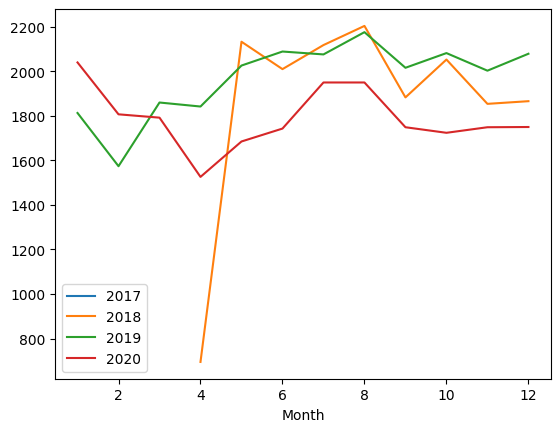

In [ ]:
yearComp.plot()

To my initial assumption that more crime committed when the prisoners were early release from jail due to COVID. A search of the web showed that 700 prisoners were released in late May. However, I do not see much of a change in patter between the years. We do see a quick increase around that time period between May and August, but it tends to follow the same trend as the previous years. Currently with this view, I am unable to point to the early release of prisoners as the decency for an uptick in crime.

In compared to prior years and examine the real Offenses. Is there an increase or decrease in specific offenses? What is your reasoning? I'd prefer to concentrate on months 4-12 because the data follows a similar pattern and magnitude for the first three months.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
for yr in range(2018, 2021):
    doc = crimeData.loc[crimeData['Year'] == yr].set_index(['Year', 'Month'])
    doc = doc['Offense'].to_csv(header=None, index=False).strip('\n').split('\n')
    vect = CountVectorizer(stop_words='english', max_features=10)
    inverted_index = vect.fit_transform(doc)
    newdf = pd.DataFrame(inverted_index.A,columns=vect.get_feature_names_out()) #

    sumDf = newdf.T
    yearCont = str(yr) + 'count'
    sumDf[yearCont] = sumDf.loc[:,0:].sum(1)

    outDf = pd.DataFrame(sumDf[yearCont])
    print(outDf.sort_values(by=[yearCont], ascending=False))

            2018count
larceny          4372
auto             2650
assault          2357
simple           2059
hit              2037
run              2037
property         2014
vandalism        1697
domestic         1095
violations        939
             2019count
larceny           5499
auto              3452
assault           3120
property          2932
hit               2915
run               2915
simple            2612
vandalism         2315
violations        1695
concealment       1440
            2020count
larceny          4223
hit              2953
run              2953
property         2919
assault          2911
auto             2543
simple           2447
vandalism        2221
violations       1774
domestic         1340


### Visualization Part 1

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


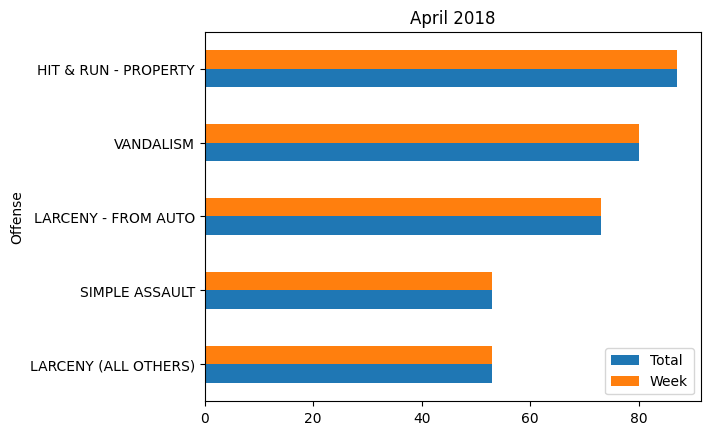

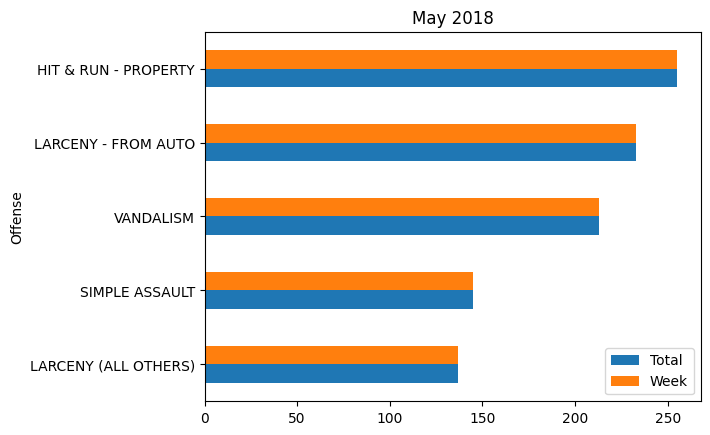

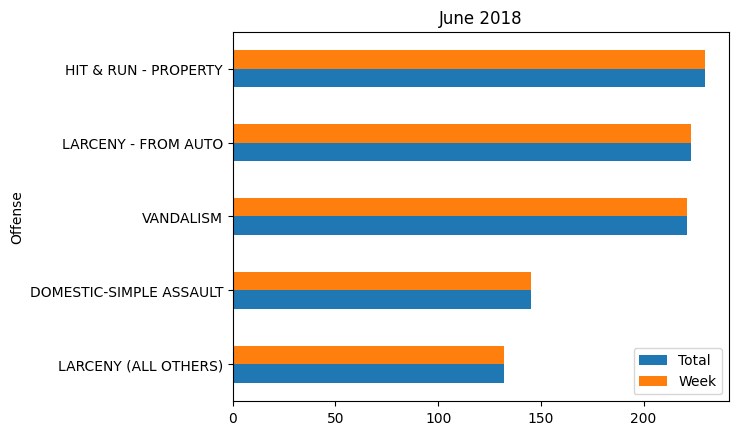

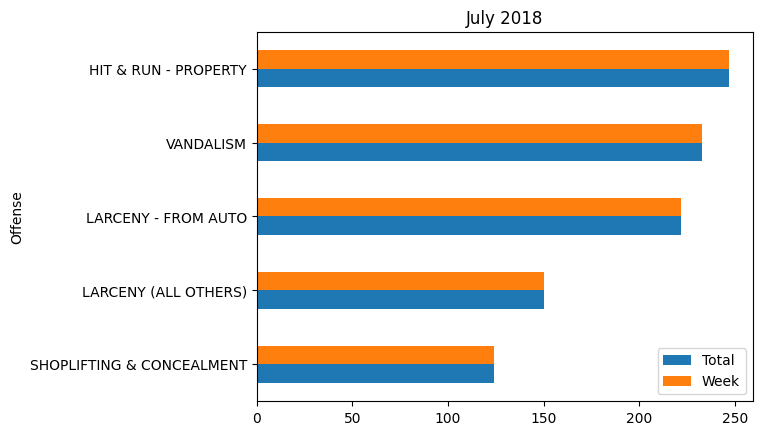

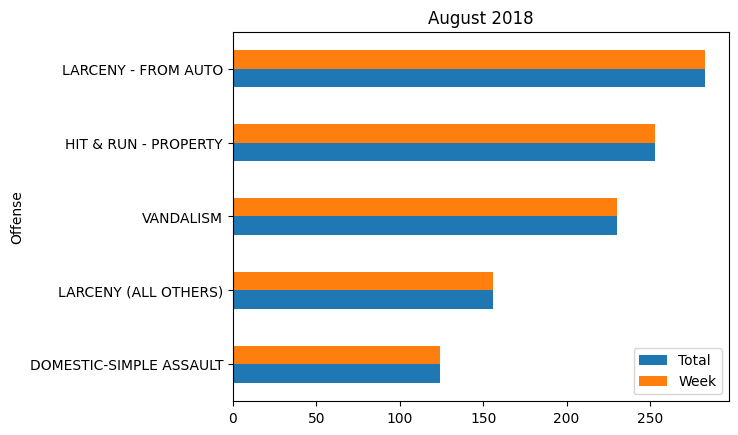

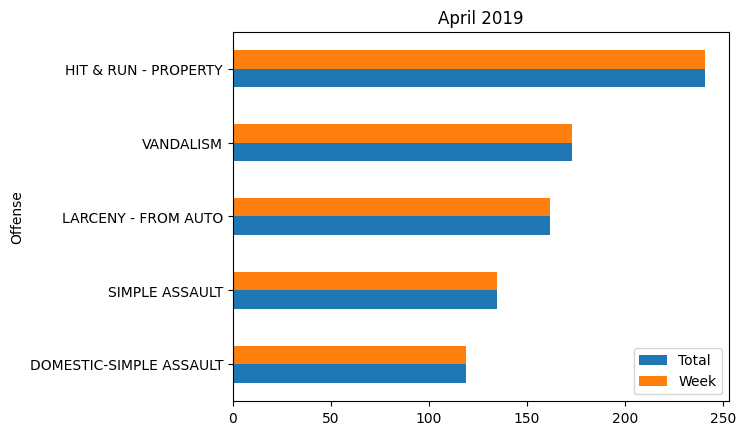

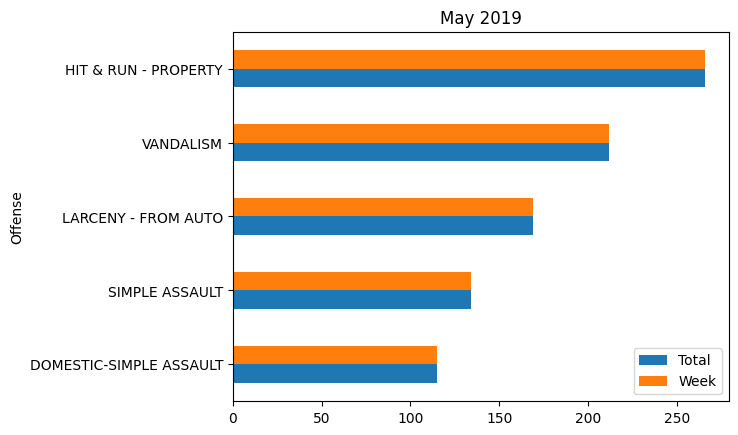

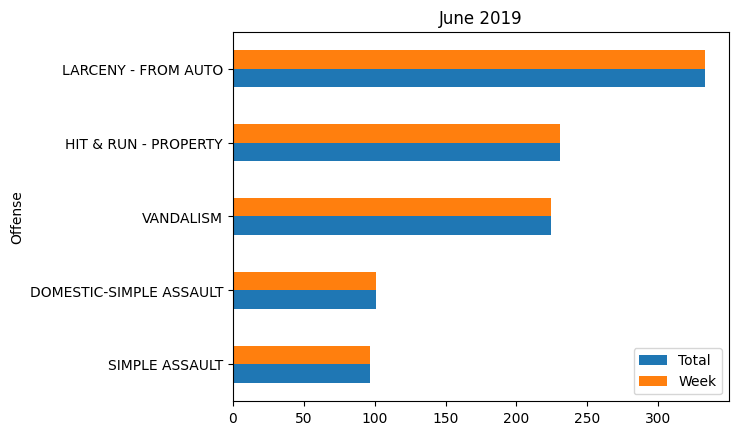

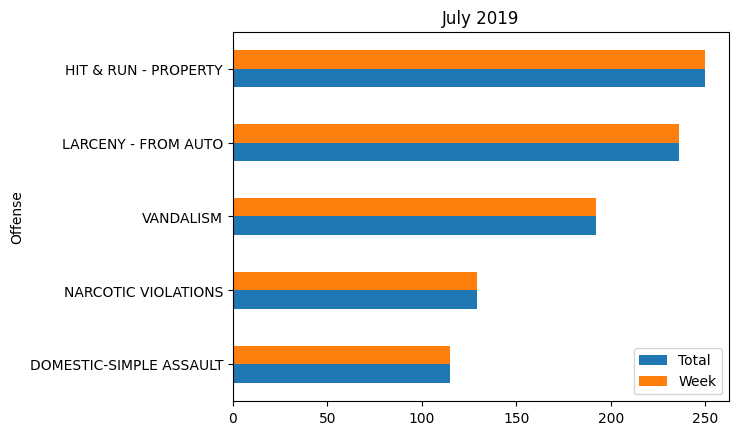

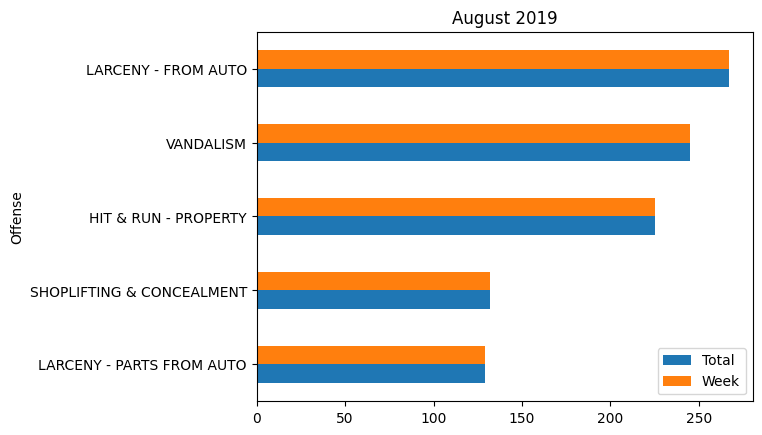

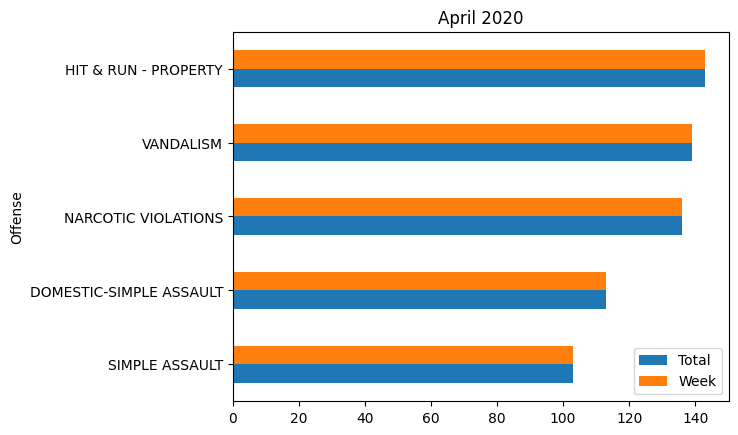

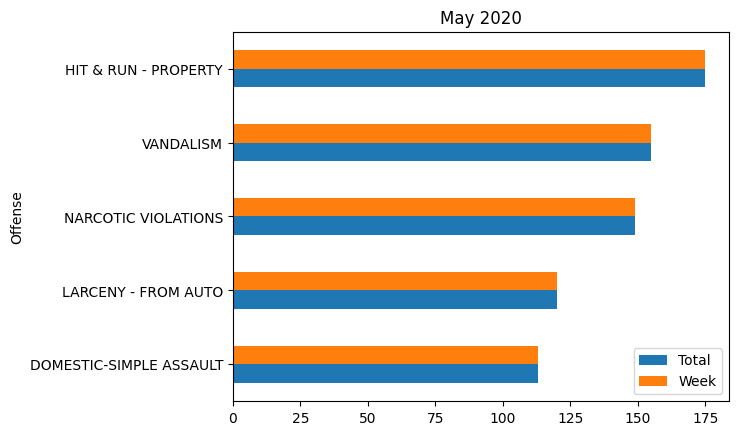

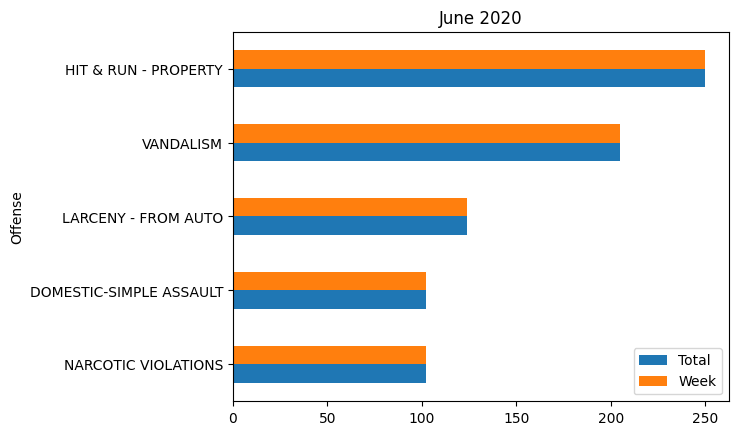

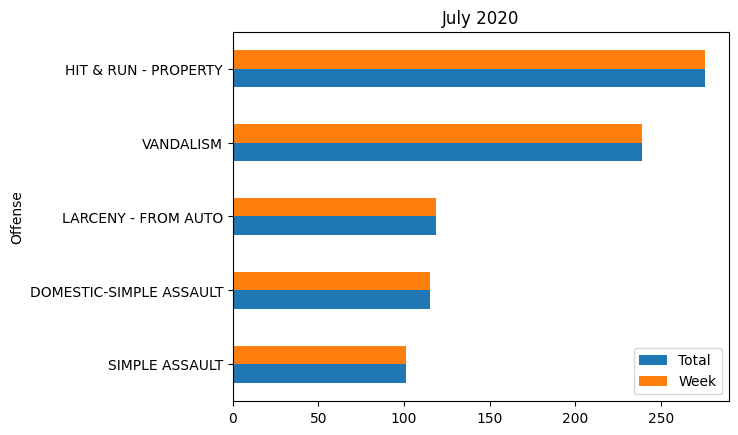

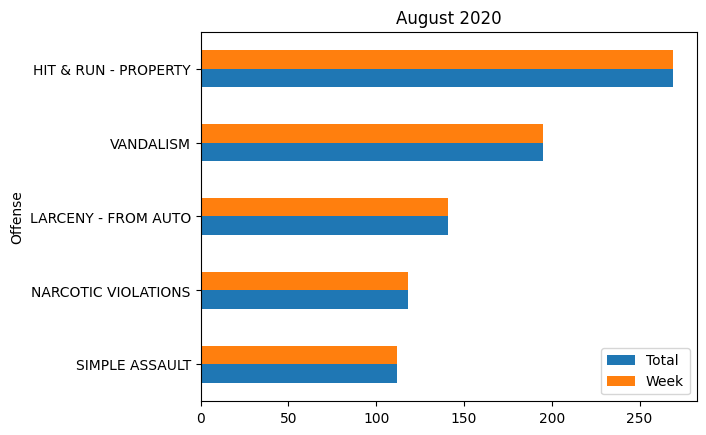

In [ ]:
df1 = crimeData.drop(["Date of Occurrence"], axis=1)

df2 = df1.groupby([pd.Grouper(key="Year"),
                         pd.Grouper(key="Month"),pd.Grouper(key="Offense")]).count()

df2.rename(columns={'ID': 'Total'}, inplace=True)

df2 = df2.sort_values(by='Total', ascending=False).reset_index()
df2 = df2.loc[(df2['Month']>=4) & (df2['Month'] <= 8)]

import calendar

for yr in range(2018, 2021):
    adf = df2.loc[(df2['Year'] == yr)].groupby('Month').head(5).sort_values(by='Month', ascending=True).reset_index(drop=True).drop('Year', axis=1)
    for m in range(4,9):
        prnDf = pd.DataFrame(adf.loc[adf['Month']==m]).set_index('Offense').sort_values(by=['Month','Total'], ascending=True)
        prnDf = prnDf.drop('Month', axis=1)

        month = calendar.month_name[m]
        print(prnDf.plot.barh(title=month + ' ' + str(yr)))

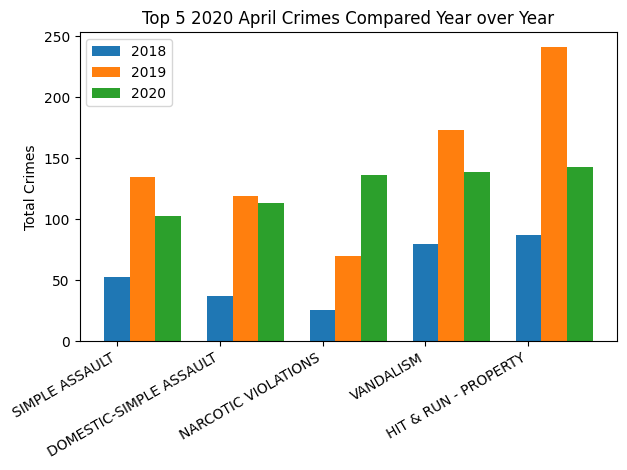

<Figure size 400x1500 with 0 Axes>

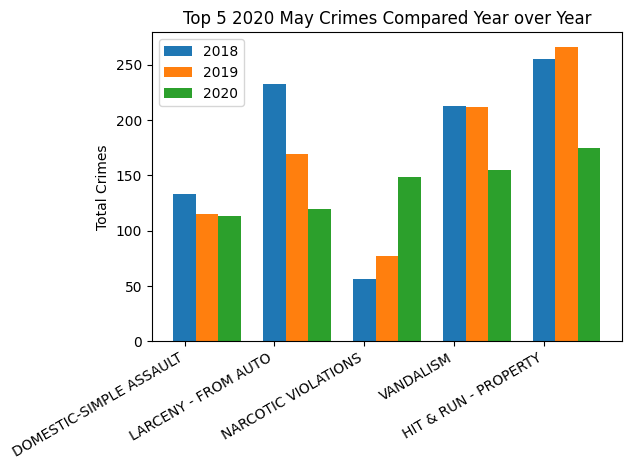

<Figure size 400x1500 with 0 Axes>

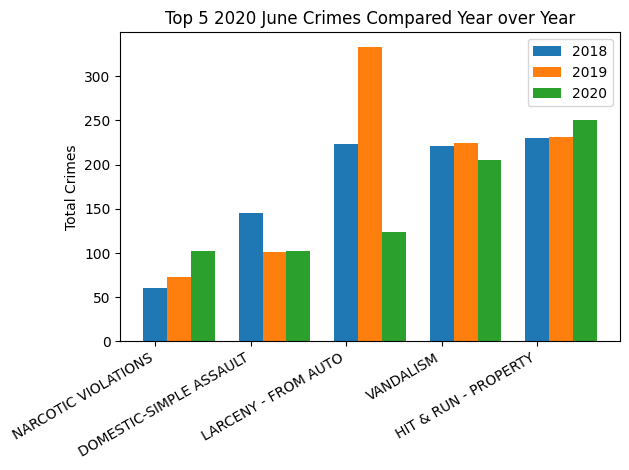

<Figure size 400x1500 with 0 Axes>

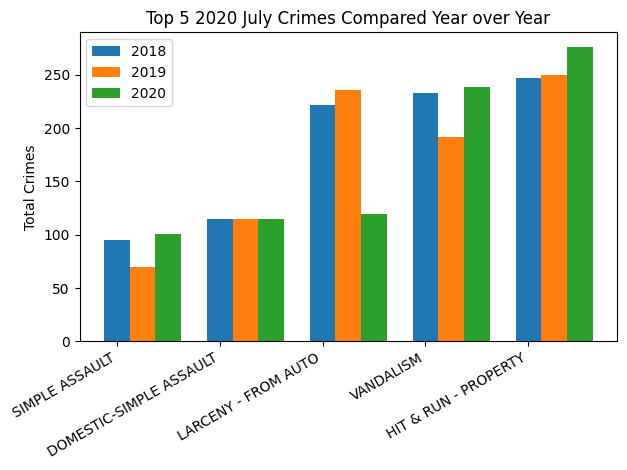

<Figure size 400x1500 with 0 Axes>

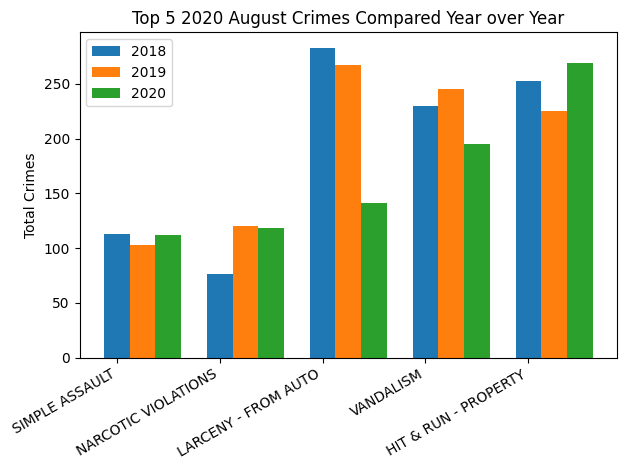

<Figure size 400x1500 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import calendar

top5y2020 = df2.loc[(df2['Year'] == 2020)].groupby('Month').head(5).sort_values(by='Month', ascending=True).reset_index(drop=True)
y2019 = df2.loc[(df2['Year'] == 2019)].groupby('Month').head(40).sort_values(by='Month', ascending=True).reset_index(drop=True)
y2018 = df2.loc[(df2['Year'] == 2018)].groupby('Month').head(40).sort_values(by='Month', ascending=True).reset_index(drop=True)

for m in range(4,9):
    month = calendar.month_name[m]

    y_m_2018 = pd.DataFrame(y2018.loc[y2018['Month']==m]).set_index('Offense').sort_values(by=['Month','Total'], ascending=True)
    y_m_2019 = pd.DataFrame(y2019.loc[y2019['Month']==m]).set_index('Offense').sort_values(by=['Month','Total'], ascending=True)

    top5yApr2020 = pd.DataFrame(top5y2020.loc[top5y2020['Month']==m]).set_index('Offense').sort_values(by=['Month','Total'], ascending=True)

    y_m_2019 = y_m_2019.reindex_like(top5yApr2020)
    y_m_2018 = y_m_2018.reindex_like(top5yApr2020)
    labels = list(top5yApr2020.index)

    y_m_2018.reset_index(inplace=True)
    y_m_2019.reset_index(inplace=True)
    top5yApr2020.reset_index(inplace=True)

#build graph...
    barWidth = 0.25  # the width of the bars

    r1 = np.arange(len(labels))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    fig, ax = plt.subplots()
    plt.figure(figsize=(4, 15))
    rects1 = ax.bar(r1, y_m_2018.Total, width=barWidth, label='2018')
    rects2 = ax.bar(r2, y_m_2019.Total, width=barWidth, label='2019')
    rects3 = ax.bar(r3, top5yApr2020.Total, width=barWidth, label='2020')

    ax.set_ylabel('Total Crimes')
    ax.set_title('Top 5 2020 '+ month +' Crimes Compared Year over Year')
    ax.set_xticks(r1)
    ax.set_xticklabels(labels)
    ax.legend()
#format x lables so they are not overlapping...
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


    fig.tight_layout()

    plt.show()
    print('\n')
    print('\n')


In [ ]:
norfolk_df=df2
norfolk_df.head()

,Year,Month,Offense,Total,Week
0,2022,8,LARCENY - FROM AUTO,377,377
1,2022,6,LARCENY - FROM AUTO,375,375
2,2022,7,LARCENY - FROM AUTO,370,370
4,2022,5,LARCENY - FROM AUTO,359,359
6,2019,6,LARCENY - FROM AUTO,333,333


### Visulization Part-2

I am collecting the dataset of the Dallas Incident report and I am eleminating the white space at the same time.I stored my dataset in the goolge drive .I am connecting the data by using the below code.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas
df = pandas.read_csv('/content/drive/MyDrive/Datavis/Police_Incident_Reports.csv',lineterminator='\n')
print('Row Count:', df.shape[0])
df.head()

Row Count: 150396


,OBJECTID,IncidentNumber,Date_Occurred,Date_Found,Offense_Code,Offense_Description,Block,Street,Precinct,Subdivision,Zone_ID,Case_Status\r
0,1,2022077686,2022/12/07 04:10:00+00,2022/12/07 04:20:00+00,13B1,"ASSAULT, SIMPLE",2400.0,CASTLETON COMMERCE WAY,1,CASTLETON COMMERCE PARK,124,PENDING - ACTIVE\r
1,2,2022077830,2022/12/06 22:47:59+00,2022/12/06 22:47:59+00,13B2,"ASSAULT, SIMPLE, DOMESTIC",NaN,NaN,NaN,NaN,NaN,UNDER REVIEW\r
2,3,2022077830,2022/12/06 22:47:59+00,2022/12/06 22:47:59+00,13B2,"ASSAULT, SIMPLE, DOMESTIC",NaN,NaN,NaN,NaN,NaN,UNDER REVIEW\r
3,4,2022077885,2022/12/04 07:02:00+00,2022/12/04 10:01:00+00,13B1,"ASSAULT, SIMPLE",400.0,OCEANA BLVD,2,OCEANA,228,UNDER REVIEW\r
4,5,2022077890,2022/12/04 06:45:00+00,2022/12/04 07:44:59+00,13B2,"ASSAULT, SIMPLE, DOMESTIC",300.0,16TH ST,2,OCEANFRONT - 31ST ST SOUTH,227,UNDER REVIEW\r


Filltering the dataset by year 2017 to 2023

In [ ]:
# Convert the 'date' column to datetime format
df['Date_Occurred'] = pandas.to_datetime(df['Date_Occurred'])

# Filter the data by a specific date range
start_date = '2017-01-01'
end_date = '2023-05-31'
filtered_df = df.loc[(df['Date_Occurred'] >= start_date) & (df['Date_Occurred'] <= end_date)]

# Store the filtered data in a new varia
filtered_data = filtered_df.to_csv(index=False)

I'm going to format my data source in the following code snippet. At a high level, I know I want to concentrate on crime done over a specific time period. This implies that I will only require two columns from my data source. The crime and the date it occurred. Because the date of occurrence is not in the appropriate format, I must write some code to format it into a valid pythiong date format. At a high level, I will simply need the date and a count of all crimes, but when I dig down to determine what sorts of crimes are affected, I will also need the offense field. I'll also want to separate the year, month, and week into buckets for subsequent visual examination.

In [ ]:
df= df.loc[:, ['IncidentNumber', 'Offense_Description','Date_Occurred']]
df = df.rename({"IncidentNumber": "ID"}, axis="columns")
df['Date_Occurred'] = pandas.to_datetime(df['Date_Occurred'], infer_datetime_format=True)
df['Year'] = pandas.DatetimeIndex(df['Date_Occurred']).year
df['Month'] = pandas.DatetimeIndex(df['Date_Occurred']).month
df['Week'] = pandas.DatetimeIndex(df['Date_Occurred']).week

df.head()

<ipython-input-15-d5b3d0c68949>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['Week'] = pandas.DatetimeIndex(df['Date_Occurred']).week


,ID,Offense_Description,Date_Occurred,Year,Month,Week
0,2022077686,"ASSAULT, SIMPLE",2022-12-07 04:10:00+00:00,2022,12,49
1,2022077830,"ASSAULT, SIMPLE, DOMESTIC",2022-12-06 22:47:59+00:00,2022,12,49
2,2022077830,"ASSAULT, SIMPLE, DOMESTIC",2022-12-06 22:47:59+00:00,2022,12,49
3,2022077885,"ASSAULT, SIMPLE",2022-12-04 07:02:00+00:00,2022,12,48
4,2022077890,"ASSAULT, SIMPLE, DOMESTIC",2022-12-04 06:45:00+00:00,2022,12,48



In this view, I wanted to take a high-level look at crime counts by year. We know the COVID pandemic started in 2020. I was wondering if crime was significantly lower in comparison to the other years, due to the lockdown, but it is only slightly lower.




In [ ]:
# Convert the 'date' column to datetime format
df['Date_Occurred'] = pandas.to_datetime(df['Date_Occurred'])

# Filter the data by a specific date range
start_date = '2017-01-01'
end_date = '2023-12-01'
crimeData_1 = df.loc[(df['Date_Occurred'] >= start_date) & (df['Date_Occurred'] <= end_date)]

# Store the filtered data in a new varia
filtered_data_1 = crimeData_1.to_csv(index=False)

In [ ]:
howManyYearsOfData = crimeData_1.Year.unique()
print(howManyYearsOfData)
print()
aggByYear = crimeData_1.groupby(['Year']).count()[['ID']]
print(aggByYear.sort_values(by=['Year','ID']))

[2022 2023 2018 2019 2020 2021]

         ID
Year       
2018  28970
2019  29396
2020  26839
2021  27407
2022  28277
2023   9507


In [ ]:
crimeData_1.head()

,ID,Offense_Description,Date_Occurred,Year,Month,Week
0,2022077686,"ASSAULT, SIMPLE",2022-12-07 04:10:00+00:00,2022,12,49
1,2022077830,"ASSAULT, SIMPLE, DOMESTIC",2022-12-06 22:47:59+00:00,2022,12,49
2,2022077830,"ASSAULT, SIMPLE, DOMESTIC",2022-12-06 22:47:59+00:00,2022,12,49
3,2022077885,"ASSAULT, SIMPLE",2022-12-04 07:02:00+00:00,2022,12,48
4,2022077890,"ASSAULT, SIMPLE, DOMESTIC",2022-12-04 06:45:00+00:00,2022,12,48


In [ ]:
import matplotlib.pyplot as plt
y2018 = crimeData_1.loc[crimeData_1['Year'] == 2018].set_index(['Year', 'Month']).count(level='Month')[['ID']]
y2019 = crimeData_1.loc[crimeData_1['Year'] == 2019].set_index(['Year', 'Month']).count(level='Month')[['ID']]
y2020 = crimeData_1.loc[crimeData_1['Year'] == 2020].set_index(['Year', 'Month']).count(level='Month')[['ID']]
y2021 = crimeData_1.loc[crimeData_1['Year'] == 2021].set_index(['Year', 'Month']).count(level='Month')[['ID']]
y2022 = crimeData_1.loc[crimeData_1['Year'] == 2022].set_index(['Year', 'Month']).count(level='Month')[['ID']]
y2023 = crimeData_1.loc[crimeData_1['Year'] == 2023].set_index(['Year', 'Month']).count(level='Month')[['ID']]
yearComp = pandas.DataFrame({'2018': y2018['ID'], '2019': y2019['ID'], '2020': y2020['ID'],'2021': y2021['ID'],'2021': y2023['ID'],'2023': y2023['ID']})

print(yearComp)

       2018  2019  2020    2021    2023
Month                                  
1      2189  2385  2500  3091.0  3091.0
2      2169  2034  2279  2779.0  2779.0
3      2316  2270  2021  2925.0  2925.0
4      2271  2462  1781   712.0   712.0
5      2523  2593  2186     NaN     NaN
6      2472  2542  2315     NaN     NaN
7      2719  2801  2417     NaN     NaN
8      2660  2614  2262     NaN     NaN
9      2380  2422  2174     NaN     NaN
10     2620  2484  2390     NaN     NaN
11     2255  2222  2285     NaN     NaN
12     2396  2567  2229     NaN     NaN


<ipython-input-19-7d68de66f0a8>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.count(level=1) should use df.groupby(level=1).count().
  y2018 = crimeData_1.loc[crimeData_1['Year'] == 2018].set_index(['Year', 'Month']).count(level='Month')[['ID']]
<ipython-input-19-7d68de66f0a8>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.count(level=1) should use df.groupby(level=1).count().
  y2019 = crimeData_1.loc[crimeData_1['Year'] == 2019].set_index(['Year', 'Month']).count(level='Month')[['ID']]
<ipython-input-19-7d68de66f0a8>:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.count(level=1) should use df.groupby(level=1).count().
  y2020 = crimeData_1.loc[crimeData_1['

<Axes: xlabel='Month'>

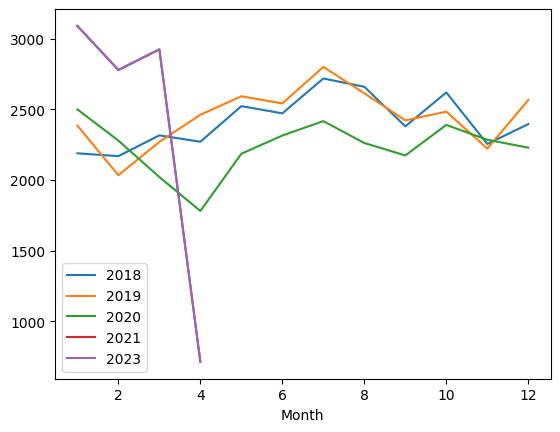

In [ ]:
yearComp.plot()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

for yr in range(2018, 2023):
    doc = df.loc[df['Year'] == yr].set_index(['Year', 'Month'])
    doc = doc['Offense_Description'].to_csv(header=None, index=False).strip('\n').split('\n')
    vect = CountVectorizer(stop_words='english', max_features=10)
    inverted_index = vect.fit_transform(doc)
    newdf = pandas.DataFrame(inverted_index.A,columns=vect.vocabulary_.keys()) #
    sumDf = newdf.T
    yearCont = str(yr) + 'count'
    sumDf[yearCont] = sumDf.loc[:,0:].sum(1)

    outDf = pandas.DataFrame(sumDf[yearCont])
    print(outDf.sort_values(by=[yearCont], ascending=False))

             2018count
motor             7172
violations        5884
assault           4570
destruction       4229
private           3873
property          3625
vehicle           3493
larceny           3357
simple            2784
drug              2681
            2019count
run              7327
larceny          5477
assault          4907
violations       4599
vehicle          3729
motor            3719
property         3594
simple           3260
hit              2557
drug             2557
             2020count
destruction       6203
motor             5694
assault           4697
vehicle           4377
drug              3530
property          3375
violations        3217
simple            2688
larceny           2534
private           2525
             2021count
run               6395
larceny           5487
assault           4731
vehicle           4407
destruction       4057
violations        3878
property          2919
hit               2582
motor             2582
simple            2560

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


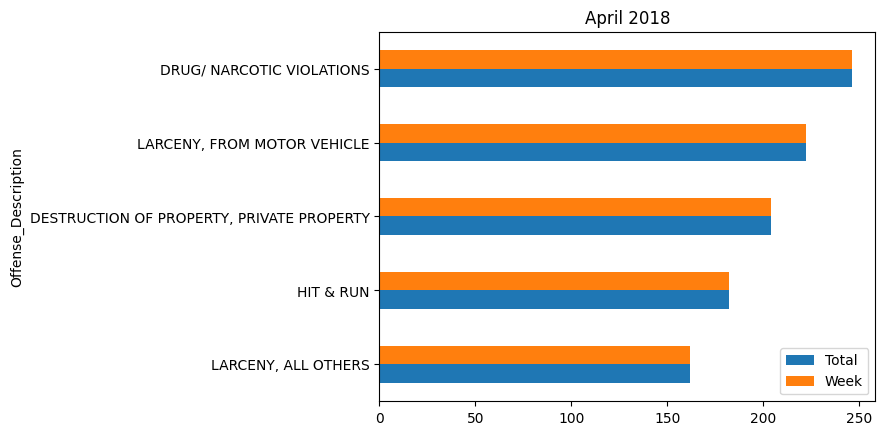

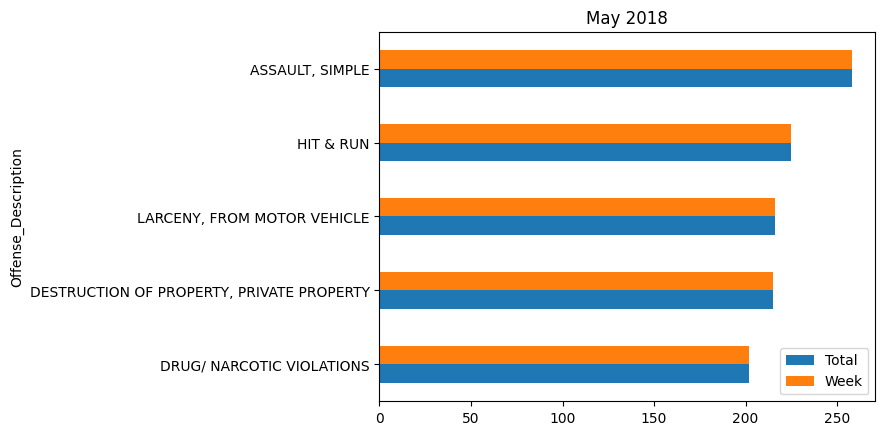

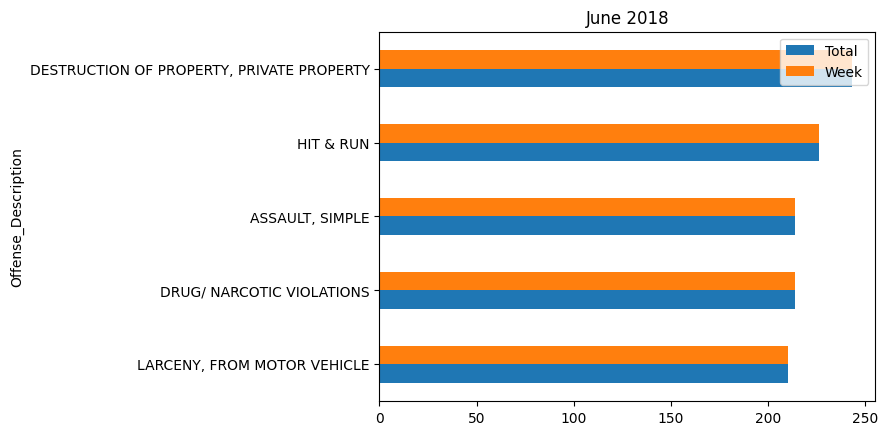

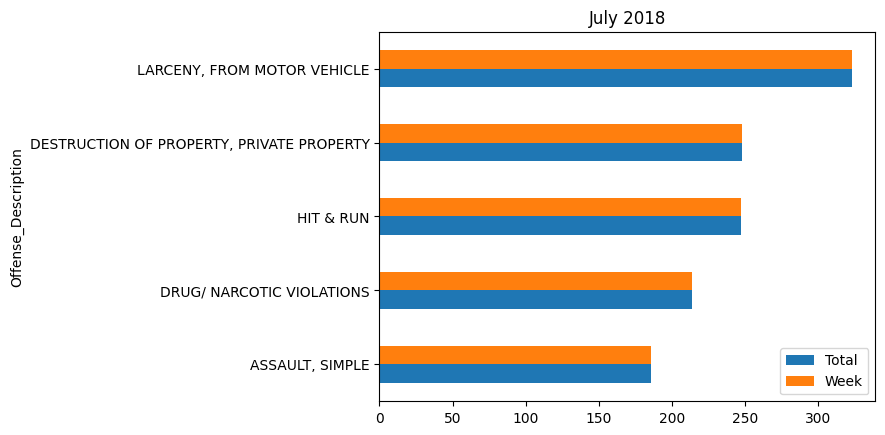

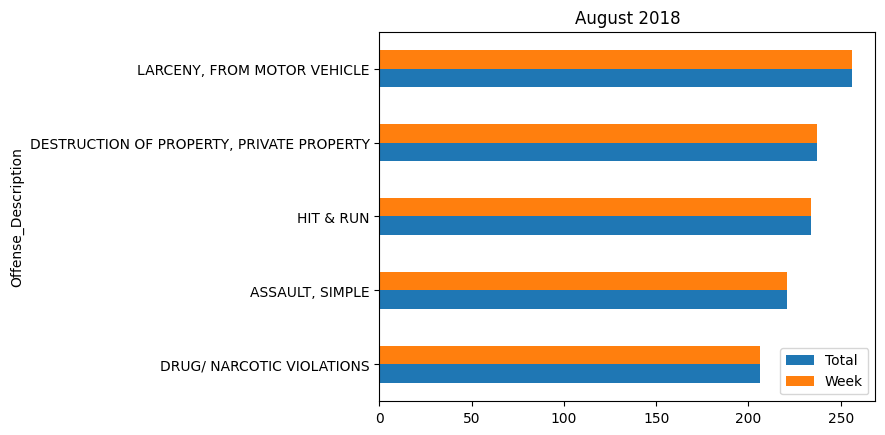

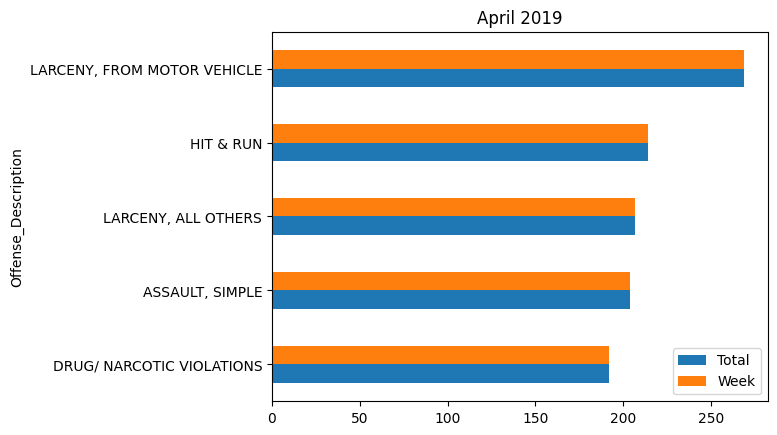

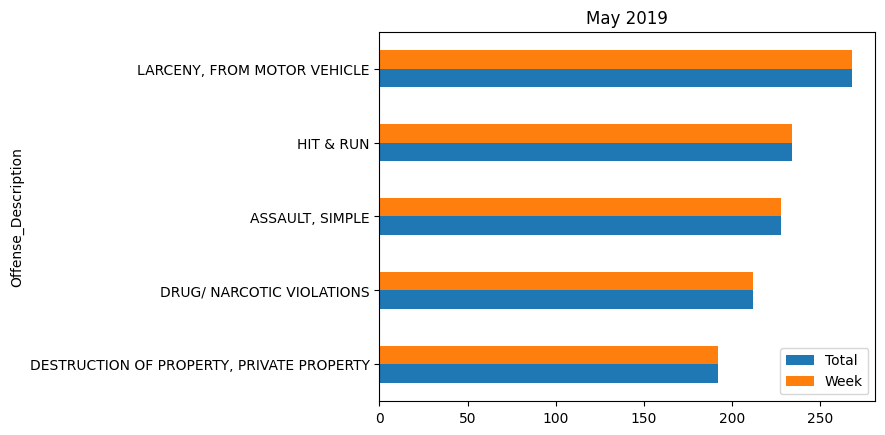

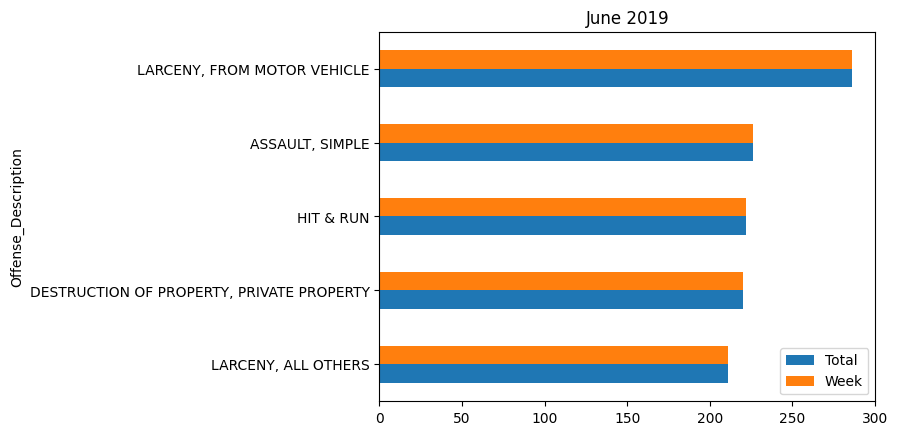

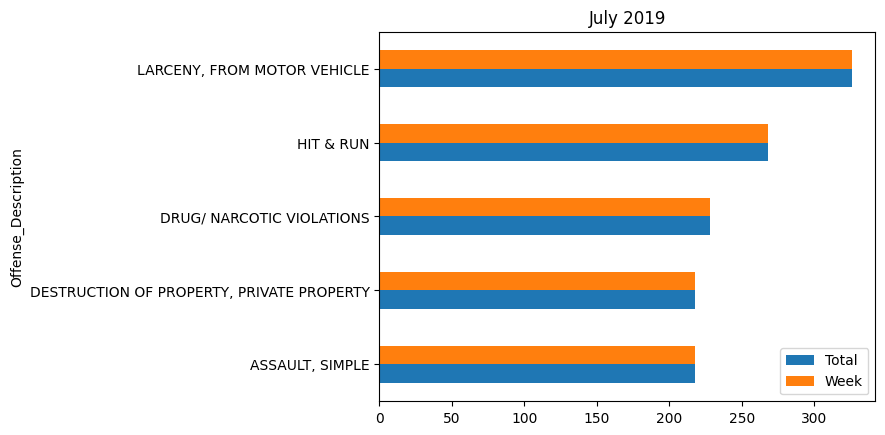

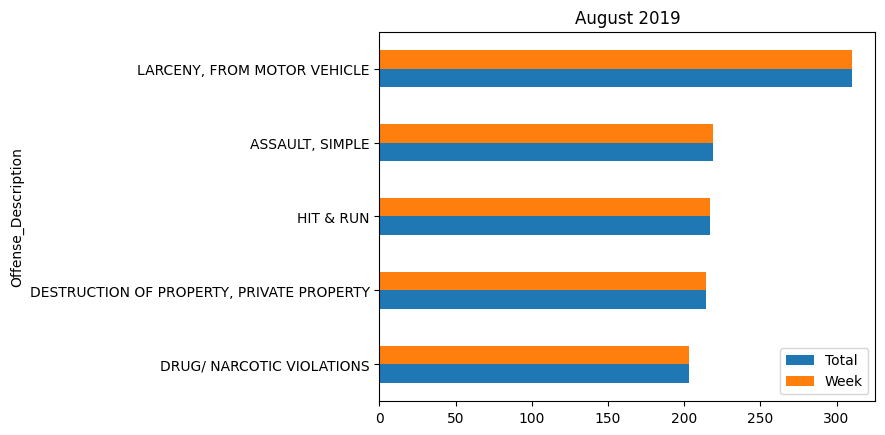

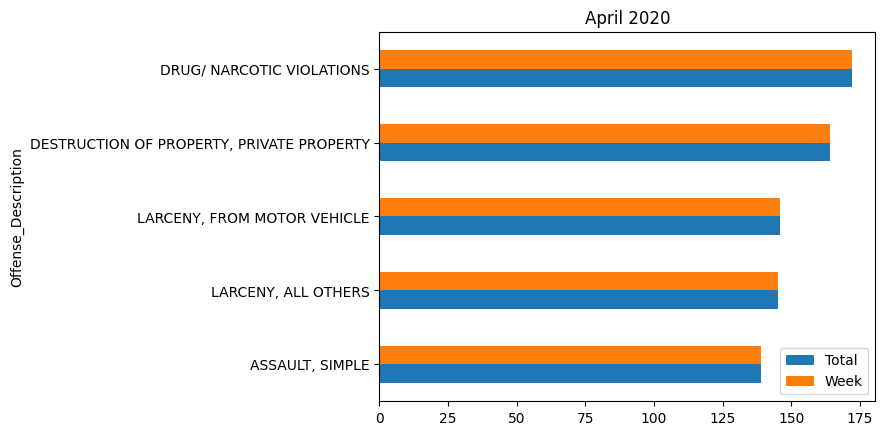

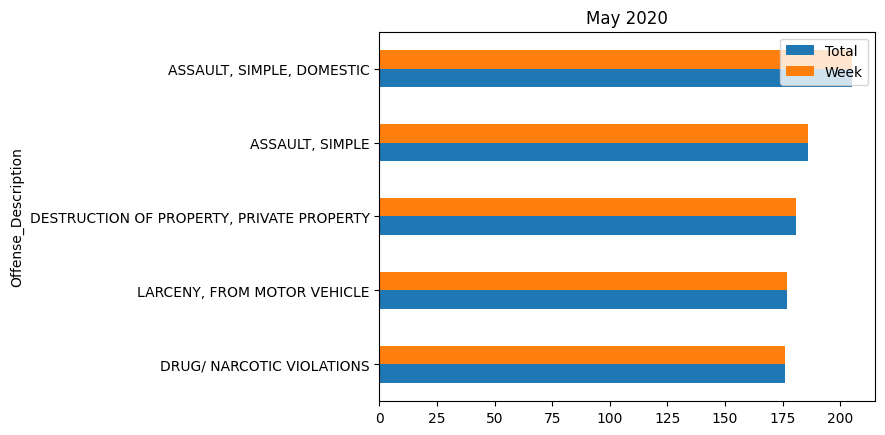

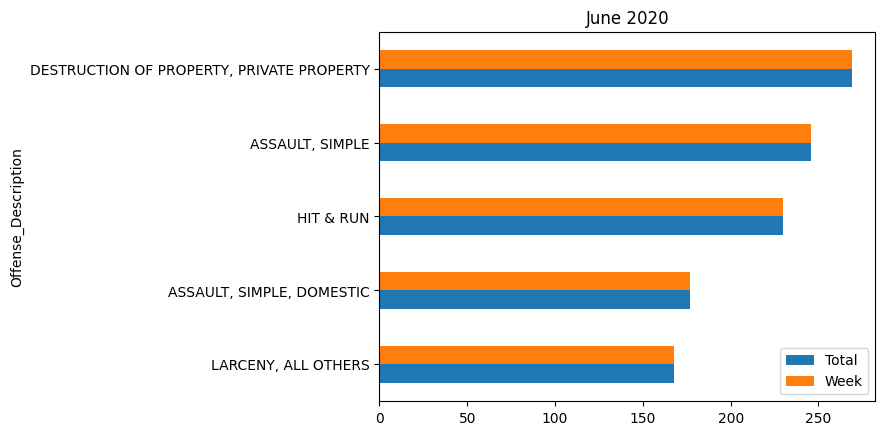

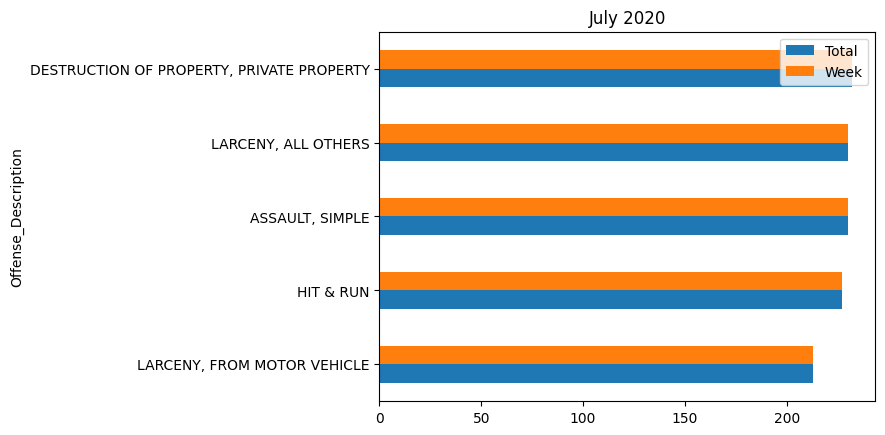

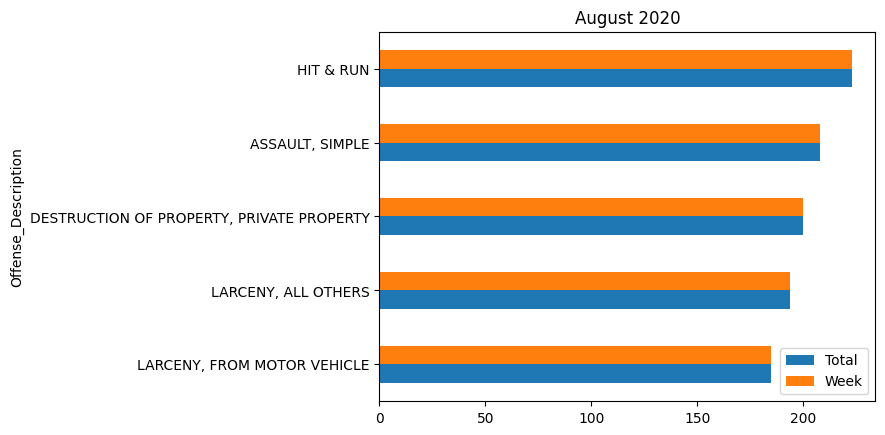

In [ ]:
df1 = crimeData_1.drop(["Date_Occurred"], axis=1)

dallas_df = df1.groupby([pandas.Grouper(key="Year"),
                         pandas.Grouper(key="Month"),pandas.Grouper(key="Offense_Description")]).count()

dallas_df.rename(columns={'ID': 'Total'}, inplace=True)

dallas_df = dallas_df.sort_values(by='Total', ascending=False).reset_index()
dallas_df = dallas_df.loc[(dallas_df['Month']>=4) & (dallas_df['Month'] <= 8)]

import calendar

for yr in range(2018, 2021):
    adf = dallas_df.loc[(dallas_df['Year'] == yr)].groupby('Month').head(5).sort_values(by='Month', ascending=True).reset_index(drop=True).drop('Year', axis=1)
    for m in range(4,9):
        prnDf = pandas.DataFrame(adf.loc[adf['Month']==m]).set_index('Offense_Description').sort_values(by=['Month','Total'], ascending=True)
        prnDf = prnDf.drop('Month', axis=1)

        month = calendar.month_name[m]
        print(prnDf.plot.barh(title=month + ' ' + str(yr)))

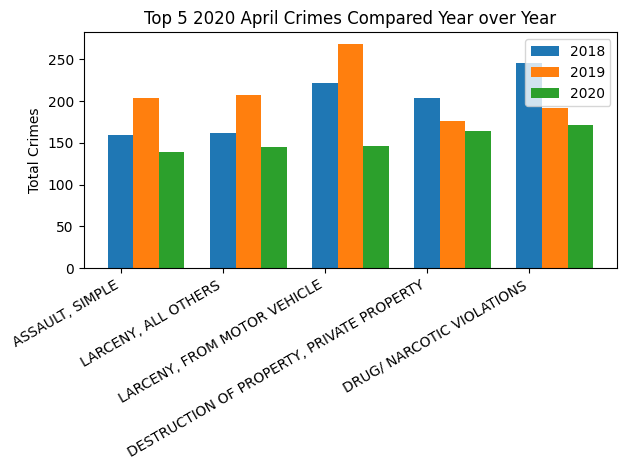

<Figure size 400x1500 with 0 Axes>

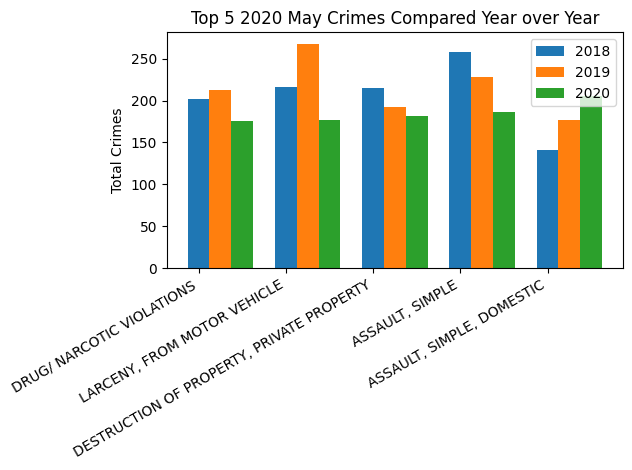

<Figure size 400x1500 with 0 Axes>

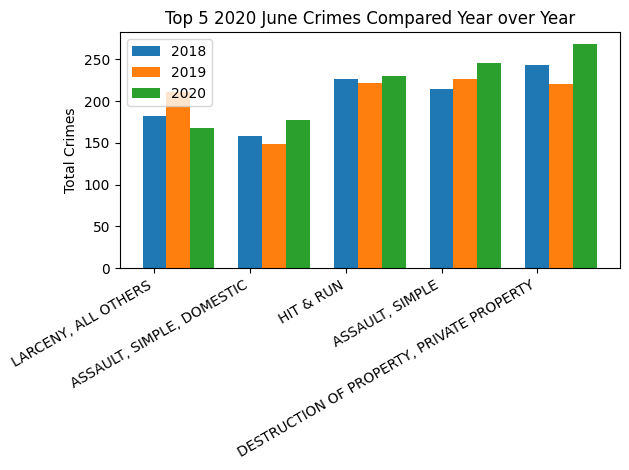

<Figure size 400x1500 with 0 Axes>

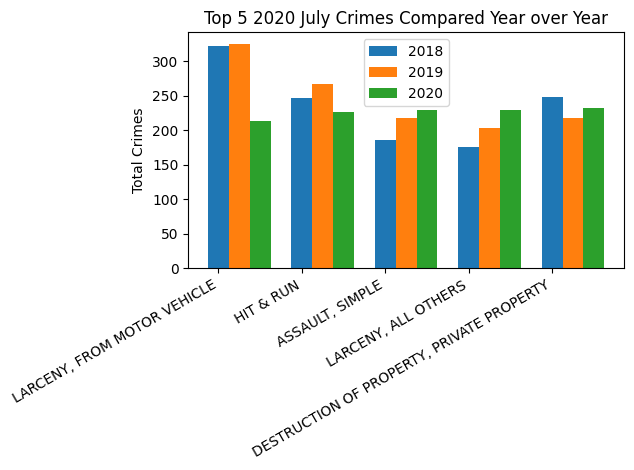

<Figure size 400x1500 with 0 Axes>

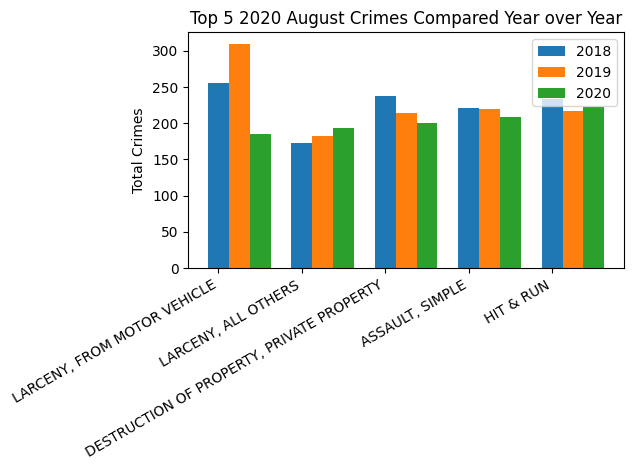

<Figure size 400x1500 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import calendar

top5y2020 = dallas_df.loc[(dallas_df['Year'] == 2020)].groupby('Month').head(5).sort_values(by='Month', ascending=True).reset_index(drop=True)
y2019 = dallas_df.loc[(dallas_df['Year'] == 2019)].groupby('Month').head(40).sort_values(by='Month', ascending=True).reset_index(drop=True)
y2018 = dallas_df.loc[(dallas_df['Year'] == 2018)].groupby('Month').head(40).sort_values(by='Month', ascending=True).reset_index(drop=True)

for m in range(4,9):
    month = calendar.month_name[m]

    y_m_2018 = pandas.DataFrame(y2018.loc[y2018['Month']==m]).set_index('Offense_Description').sort_values(by=['Month','Total'], ascending=True)
    y_m_2019 = pandas.DataFrame(y2019.loc[y2019['Month']==m]).set_index('Offense_Description').sort_values(by=['Month','Total'], ascending=True)

    top5yApr2020 = pandas.DataFrame(top5y2020.loc[top5y2020['Month']==m]).set_index('Offense_Description').sort_values(by=['Month','Total'], ascending=True)

    y_m_2019 = y_m_2019.reindex_like(top5yApr2020)
    y_m_2018 = y_m_2018.reindex_like(top5yApr2020)
    labels = list(top5yApr2020.index)

    y_m_2018.reset_index(inplace=True)
    y_m_2019.reset_index(inplace=True)
    top5yApr2020.reset_index(inplace=True)

#build graph...
    barWidth = 0.25  # the width of the bars

    r1 = np.arange(len(labels))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    fig, ax = plt.subplots()
    plt.figure(figsize=(4, 15))
    rects1 = ax.bar(r1, y_m_2018.Total, width=barWidth, label='2018')
    rects2 = ax.bar(r2, y_m_2019.Total, width=barWidth, label='2019')
    rects3 = ax.bar(r3, top5yApr2020.Total, width=barWidth, label='2020')

    ax.set_ylabel('Total Crimes')
    ax.set_title('Top 5 2020 '+ month +' Crimes Compared Year over Year')
    ax.set_xticks(r1)
    ax.set_xticklabels(labels)
    ax.legend()
#format x lables so they are not overlapping...
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


    fig.tight_layout()

    plt.show()
    print('\n')
    print('\n')

## **First Question**

The total number of crimes in each city for each year
Are there any years where there was a significant increase or decrease in the number of offenses reported in both Norfolk and Dallas?

<ipython-input-35-578c666c255f>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  norfolk_data = norfolk_df.groupby('Year').sum()['Total']
<ipython-input-35-578c666c255f>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dallas_data = dallas_df.groupby('Year').sum()['Total']


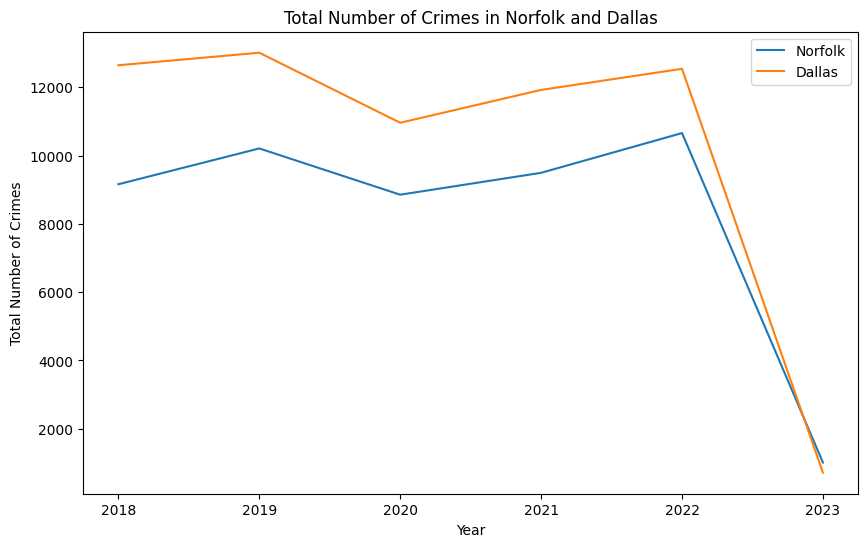

In [ ]:
import matplotlib.pyplot as plt

# Extract data for Norfolk and Dallas
norfolk_data = norfolk_df.groupby('Year').sum()['Total']
dallas_data = dallas_df.groupby('Year').sum()['Total']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data for Norfolk and Dallas as line graphs
ax.plot(norfolk_data.index, norfolk_data, label='Norfolk')
ax.plot(dallas_data.index, dallas_data, label='Dallas')

# Add axis labels and a title
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Crimes')
ax.set_title('Total Number of Crimes in Norfolk and Dallas')

# Add a legend
ax.legend()

# Show the plot
plt.show()


<ipython-input-36-e243eb976fa3>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dallas_yearly = dallas_df.groupby('Year').sum()['Total']
<ipython-input-36-e243eb976fa3>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  norfolk_yearly = norfolk_df.groupby('Year').sum()['Total']


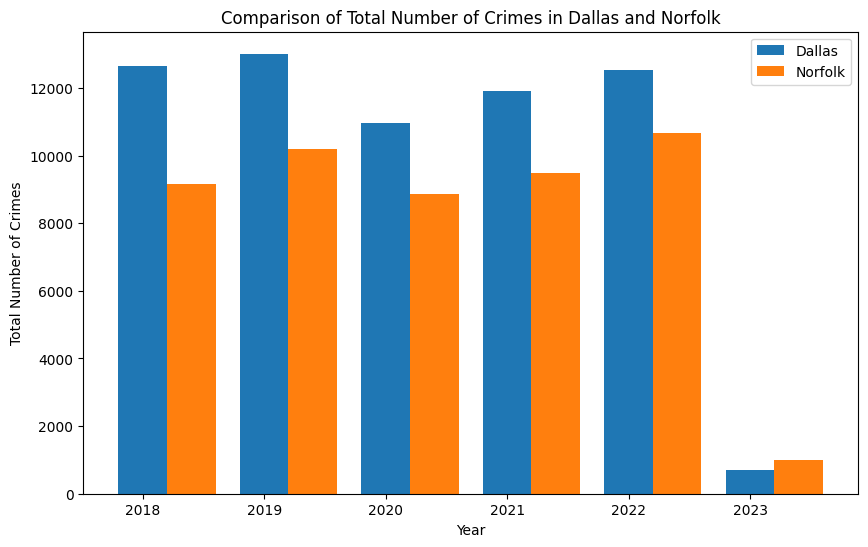

In [ ]:
import matplotlib.pyplot as plt

# Get the total number of crimes for each year in Dallas and Norfolk
dallas_yearly = dallas_df.groupby('Year').sum()['Total']
norfolk_yearly = norfolk_df.groupby('Year').sum()['Total']

# Create a bar chart showing the total number of crimes in each city for each year
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(dallas_yearly.index, dallas_yearly, width=0.4, label='Dallas')
ax.bar(norfolk_yearly.index + 0.4, norfolk_yearly, width=0.4, label='Norfolk')
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Crimes')
ax.set_title('Comparison of Total Number of Crimes in Dallas and Norfolk')
ax.legend()
plt.show()

### Second Question

Which days of the week have the highest frequency of offenses reported in Norfolk and Dallas, and do they differ significantly?    

In [ ]:
norfolk_df = crimeData
dallas_df = crimeData_1

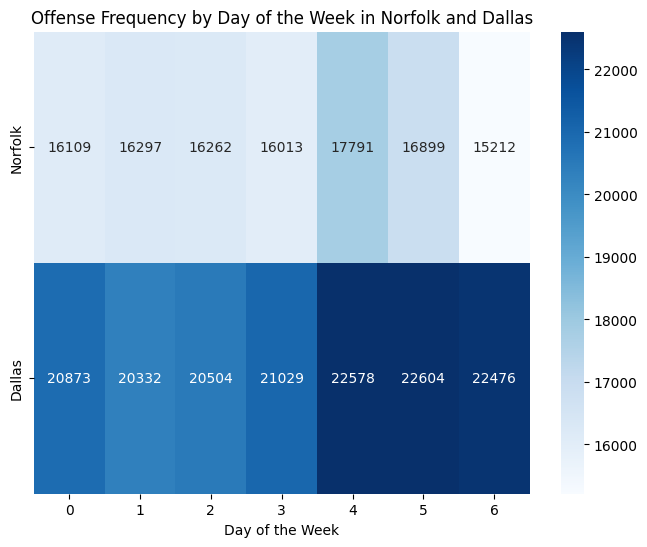

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

norfolk_df['Date of Occurrence'] = pd.to_datetime(norfolk_df['Date of Occurrence'])
norfolk_df['Day of Week'] = norfolk_df['Date of Occurrence'].dt.dayofweek

dallas_df['Day of Week'] = pd.to_datetime(dallas_df['Date_Occurred']).dt.dayofweek

# group offenses by day of the week for Norfolk and Dallas
norfolk_daily = norfolk_df.groupby('Day of Week').size()
dallas_daily = dallas_df.groupby('Day of Week').size()

# create a matrix of the frequency of offenses by day of the week in Norfolk and Dallas
offense_matrix = np.array([norfolk_daily.values, dallas_daily.values])

# create a heat map to visualize the frequency of offenses by day of the week in Norfolk and Dallas
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(offense_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=norfolk_daily.index, yticklabels=['Norfolk', 'Dallas'])
ax.set_xlabel('Day of the Week')
ax.set_ylabel('')
ax.set_title('Offense Frequency by Day of the Week in Norfolk and Dallas')
plt.show()


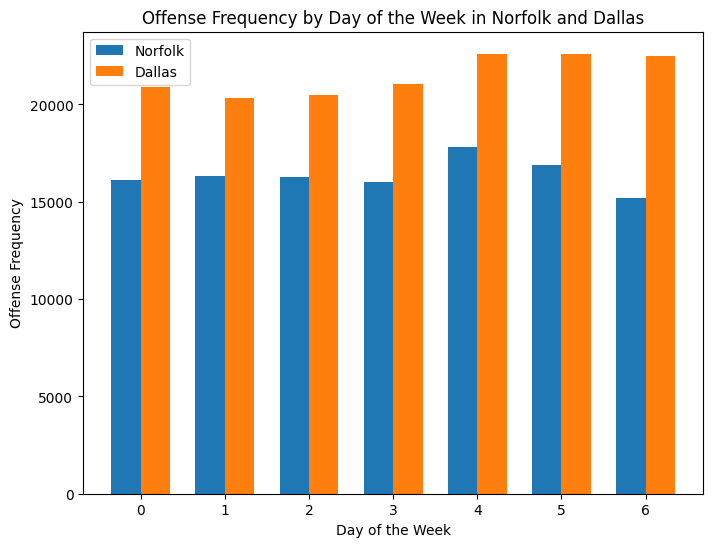

In [ ]:
# group offenses by day of the week for Norfolk and Dallas
norfolk_daily = norfolk_df.groupby('Day of Week').size()
dallas_daily = dallas_df.groupby('Day of Week').size()

# create a bar chart to compare the frequency of offenses by day of the week in Norfolk and Dallas
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
x = norfolk_daily.index
y1 = norfolk_daily.values
y2 = dallas_daily.values
ax.bar(x - bar_width/2, y1, bar_width, label='Norfolk')
ax.bar(x + bar_width/2, y2, bar_width, label='Dallas')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Offense Frequency')
ax.set_title('Offense Frequency by Day of the Week in Norfolk and Dallas')
ax.legend()
plt.show()

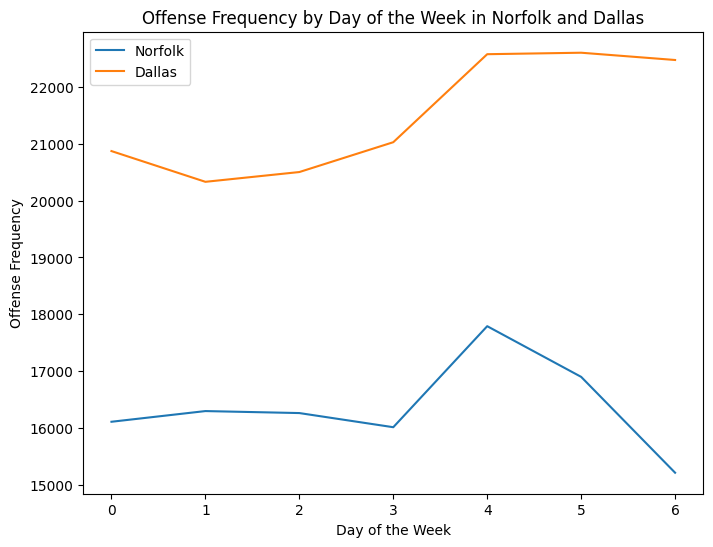

In [ ]:

# group offenses by day of the week for Norfolk and Dallas
norfolk_daily = norfolk_df.groupby('Day of Week').size()
dallas_daily = dallas_df.groupby('Day of Week').size()

# create a line chart to compare the frequency of offenses by day of the week in Norfolk and Dallas
fig, ax = plt.subplots(figsize=(8, 6))
x = norfolk_daily.index
y1 = norfolk_daily.values
y2 = dallas_daily.values
ax.plot(x, y1, label='Norfolk')
ax.plot(x, y2, label='Dallas')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Offense Frequency')
ax.set_title('Offense Frequency by Day of the Week in Norfolk and Dallas')
ax.legend()
plt.show()
